### Importando a base
- Base: 'BaseInadimplencia.xlsx'
    - Aba: 'teste'

In [33]:
# Importando o pandas e a base
import pandas as pd
base=pd.read_excel('BaseInadimplencia.xlsx', sheet_name='treino')
teste=pd.read_excel('BaseInadimplencia.xlsx', sheet_name='teste')

In [10]:
# Visualizando as 5 primeiras linhas
base.head(5)

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-3.910816,-0.874096,0
2,-2.745822,-2.250098,0
3,-1.352205,-1.280924,0
4,-0.596639,-2.932358,0


In [11]:
# Analisando as informações da nossa base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaldoConta         822 non-null    float64
 1   SaldoInvestimento  822 non-null    float64
 2   Situacao           822 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 19.4 KB


In [12]:
# Entendendo as informações estatísticas
base.describe()

,SaldoConta,SaldoInvestimento,Situacao
count,822.000000,822.000000,822.000000
mean,-0.247795,-0.132280,0.459854
std,2.833035,2.818233,0.498689
min,-5.849007,-6.078304,0.000000
25%,-2.769107,-2.630050,0.000000
50%,-0.813568,-0.864735,0.000000
75%,2.326787,2.538630,1.000000
max,6.231182,5.960512,1.000000


### Analisando a base importada
- Vamos criar um scatter plot com os dados importados
    - https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

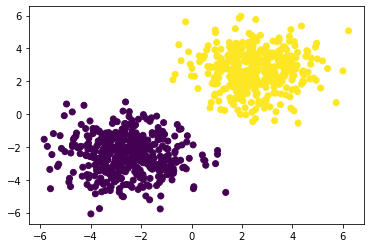

In [13]:
# Criando um scatter plot usando as informações da base e com as cores sendo a classificação do modelo
import matplotlib.pyplot as plt

fig,ax=plt.subplots()

x=base['SaldoConta']
y=base['SaldoInvestimento']

ax.scatter(x,y,c=base['Situacao'])

plt.show()

### Criando o modelo usando uma reta que separe esses pontos
- Vamos criar uma reta como fizemos no projeto 3, capaz de separar esses dados

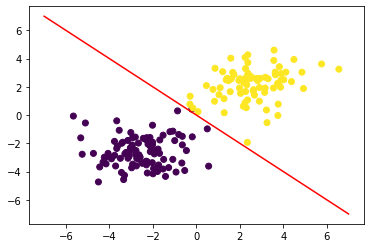

In [37]:
# Criando uma reta capaz de separar esses pontos
fig,ax=plt.subplots()

#criando o scatter dados treino
#x=base['SaldoConta']
#y=base['SaldoInvestimento']
#ax.scatter(x,y,c='b')

#criando o scatter dados teste
x=teste['SaldoConta']
y=teste['SaldoInvestimento']
ax.scatter(x,y,c=teste['Situacao'])

# criando a reta
x_reta=[-7,7]
y_reta=[7,-7]
ax.plot(x_reta,y_reta,c='r')

plt.show()

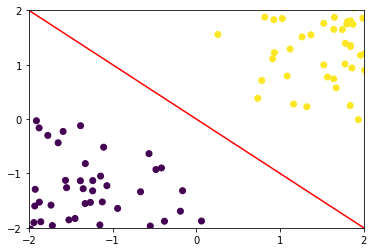

In [15]:
# Avaliando a capacidade da reta de separar os dados
import numpy as np
fig,ax=plt.subplots()

# criando o scatter
x=base['SaldoConta']
y=base['SaldoInvestimento']
ax.scatter(x,y,c=base['Situacao'])

# criando a reta
x_reta=[-7,7]
y_reta=[7,-7]
ax.plot(x_reta,y_reta,c='r')

# "dando zoom" ou configurando somente o que queremos ver no gráfico
ax.set(xlim=(-2,2), xticks=np.arange(-2,3),
       ylim=(-2,2), yticks=np.arange(-2,3))

plt.show()

### Criando uma função que consiga classificar os dados de treino
- Agora vamos criar uma função que seja capaz de classificar cada um dos pontos da base de treino

In [16]:
# Transformando a reta criada acima em uma função

# equação de todas as retas
y = ax+b

# entao ficamos assim
x_reta=[-7,7] -> 7 = a.(-7)+b
y_reta=[7,-7] -> -7 = a.7+b

# depois de substituir os valores, temos que pegar um deles e multiplicar por -1
-7 = a.7-b
-7 = a.7+b
-14 = a.14+0
-14/14 = a
-1 = a

-7 = a.7+b
-7 = (-1).(7)+b
-7 = -7+b
0 = b

y = ax+b
y = -x+0
y = -x

SyntaxError: invalid syntax (131752901.py, line 7)

In [ ]:
y_modelo = -x_modelo

In [17]:
base.head(2)

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-3.910816,-0.874096,0


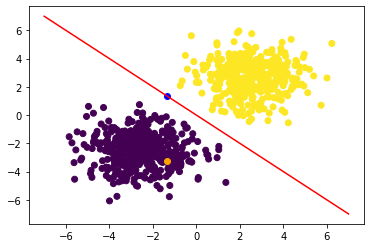

In [18]:
# Aplicando a função aos dados de treino
fig,ax=plt.subplots()

#criando o scatter
x=base['SaldoConta']
y=base['SaldoInvestimento']
ax.scatter(x,y,c=base['Situacao'])

# criando a reta
x_reta=[-7,7]
y_reta=[7,-7]
ax.plot(x_reta,y_reta,c='r')

# novo ponto que to analisando
ax.scatter(-1.365390,-3.280278,c='orange')

# ponto no modelo que criei
ax.scatter(-1.365390,1.365390,c='b')

plt.show()

In [19]:
# Criando uma função que classifica os pontos
def clf(x,y):
    y_modelo = -x
    if y_modelo>=y:
        return 0
    elif y_modelo<y:
        return 1

In [38]:
# Aplicando a função aos dados de treino
base['predict']=base.apply(lambda x:clf(x['SaldoConta'],x['SaldoInvestimento']),axis=1)
teste['predict']=teste.apply(lambda x:clf(x['SaldoConta'],x['SaldoInvestimento']),axis=1)

In [39]:
# Visualizando a base
teste.head()

,SaldoConta,SaldoInvestimento,Situacao,predict
0,-1.992492,-4.158429,0,0
1,-3.306014,-4.261263,0,0
2,-2.027399,-3.370517,0,0
3,-1.214772,-1.177712,0,0
4,-3.757442,-2.849533,0,0


In [40]:
# Utilizando o group by
teste.groupby(['Situacao','predict'])['Situacao'].count()

Situacao  predict
0         0          98
          1           1
1         1          79
Name: Situacao, dtype: int64

### Avaliando o modelo criado
- Para avaliar o modelo, vamos começar utilizando a matriz de confusão (confusion matrix)
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [27]:
# Matriz Confusão Base Treino
from sklearn.metrics import confusion_matrix

y_true=base['Situacao']
y_pred=base['predict']

confusion_matrix(y_true, y_pred)

array([[444,   0],
       [  0, 378]], dtype=int64)

In [41]:
# Matriz Confusão Base Teste

y_true=teste['Situacao']
y_pred=teste['predict']

confusion_matrix(y_true, y_pred)

array([[98,  1],
       [ 0, 79]], dtype=int64)

- Vamos calcular a acurácia
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [28]:
# Quantos o modelo acertou? Base Treino

# Acurária = (Verdadeiro Positivo + Verdadeiro Negativo) / Total

from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

1.0

In [42]:
# Quantos o modelo acertou? Base Teste

# Acurária = (Verdadeiro Positivo + Verdadeiro Negativo) / Total

from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9943820224719101

- E então vamos utilizar a precisão
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

In [32]:
# Dos que eram verdadeiros, quantos eu consigui avaliar como verdadeiro? Base Treino

# Precisão = Verdadeiro Positivo / (Verdadeiro Positivo + Falso Positivo)

from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

1.0

In [43]:
# Dos que eram verdadeiros, quantos eu consigui avaliar como verdadeiro? Base Teste

# Precisão = Verdadeiro Positivo / (Verdadeiro Positivo + Falso Positivo)

from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.9875

- E o recall
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

In [31]:
# Base Treino

# Recall = Verdadeiro Positivo / (Verdadeiro Positivo + Falso Negativo)

from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

1.0

In [44]:
# Base Teste

# Recall = Verdadeiro Positivo / (Verdadeiro Positivo + Falso Negativo)

from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

1.0